In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

print(os.getcwd())

/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/0.5gcc_1000K_3B_graphs/test_notebooks


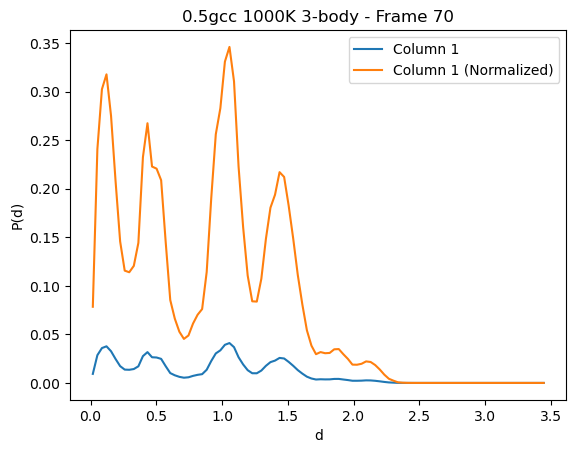

In [2]:
file_path_3b = "/Users/blaubach/chimes_CGD-myLLFork/dissimilarity_clustering/dft_pds/all_pd_3b/0070-0070.3b_clu-s.hist"

# Load the .hist file into a DataFrame
data = pd.read_csv(file_path_3b, sep='\s+', header=None, names=['Column1', 'Column2'])

# Plot the first column
plt.plot(data['Column1'], data['Column2'],label='Column 1')

# Add labels and legend for data from .hist file
plt.xlabel('d')
plt.ylabel('P(d)')
plt.title('0.5gcc 1000K 3-body - Frame 70')
plt.legend()

from scipy.integrate import simps

# Extract data
x_values = data['Column1']
y_values = data['Column2']

# Calculate the total area under the curve
total_area = simps(y_values, x=x_values)

# Calculate the range of x-values
x_range = max(x_values) - min(x_values)

# Normalize the y-values
normalized_y_values = y_values / (total_area * x_range)

# Plot the normalized curve
plt.plot(x_values, normalized_y_values, label='Column 1 (Normalized)')
plt.xlabel('d')
plt.ylabel('P(d)')
plt.title('0.5gcc 1000K 3-body - Frame 70')
plt.legend()
plt.show()



In [3]:
file_path_graphs = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/0.5gcc_1000K_3B_graphs/0.5gcc_1000k_3bs/0070.3b_clu-s.txt" 

# Load the .hist file into a DataFrame
graphs = pd.read_csv(file_path_graphs, sep='\s+', header=None, names=['side1', 'side2', 'side3'])

# Initialize diss_values as an empty list to store the computed L2 norm differences
diss_values = []

# Iterate over each pair of rows
for i in range(len(graphs)):
    for j in range(i+1, len(graphs)):
        # Compute the L2 norm difference between row i and row j
        graph1 = np.sort(graphs.iloc[i])
        graph2 = np.sort(graphs.iloc[j])
        diff = np.sqrt((graph1[0] - graph2[0])**2 + (graph1[1] - graph2[1])**2 + (graph1[2] - graph2[2])**2)
        # Append the result to diss_values
        diss_values.append(diff)

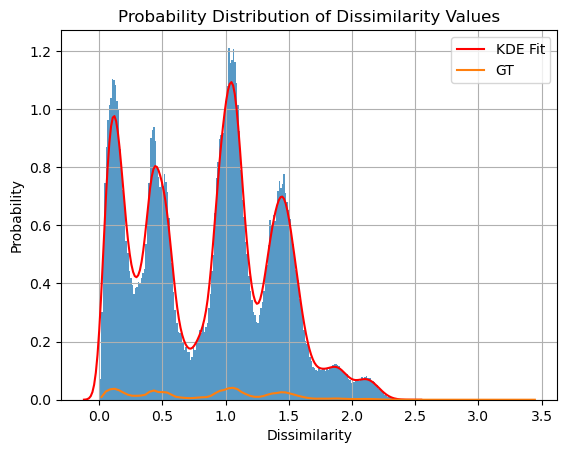

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of diss_values
plt.hist(diss_values, bins=200, density=True, alpha=0.75)  # Adjust bins as needed
plt.title('Probability Distribution of Dissimilarity Values')
plt.xlabel('Dissimilarity')
plt.ylabel('Probability')
plt.grid(True)
sns.kdeplot(diss_values, color='red', linestyle='-', label='KDE Fit')
plt.plot(data['Column1'], data['Column2'],label='GT')
plt.legend()
plt.show()


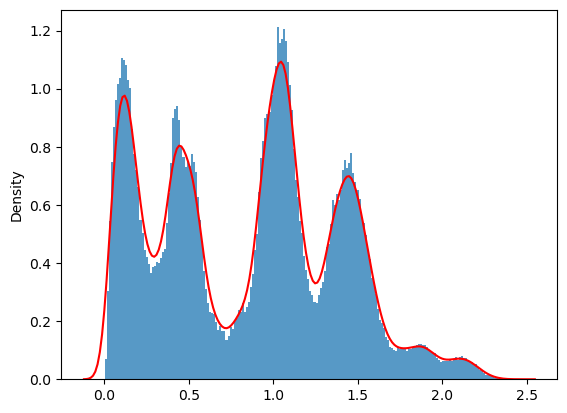

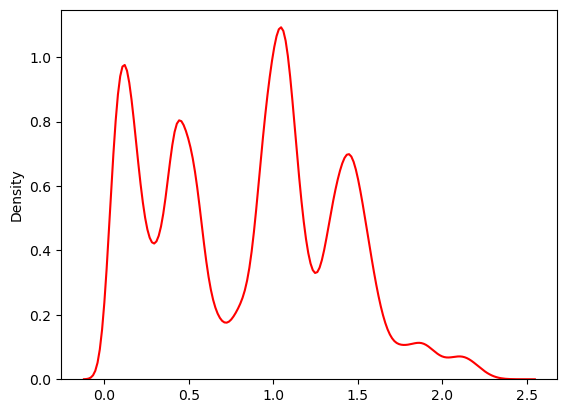

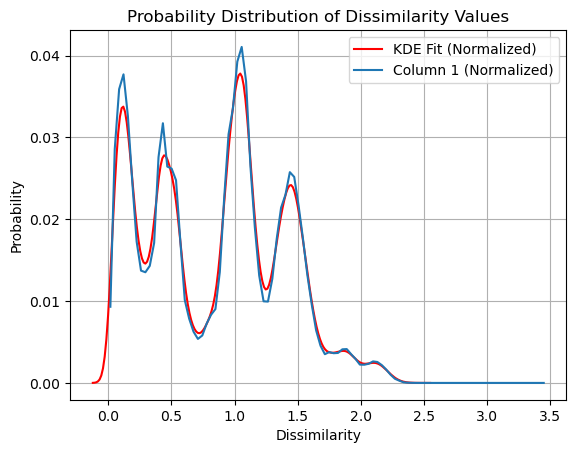

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot histogram of diss_values
plt.hist(diss_values, bins=200, density=True, alpha=0.75, label='Histogram')  # Adjust bins as needed

# Fit and plot KDE
sns.kdeplot(diss_values, color='red', linestyle='-', label='KDE Fit')
plt.show()

# Get KDE data
kde_data = sns.kdeplot(diss_values, color='red', linestyle='-', label='KDE Fit').get_lines()[0].get_data()
x_kde, y_kde = kde_data
plt.show()
# Normalize the KDE curve
area_under_kde = np.trapz(y_kde, x=x_kde)
scaled_kde = y_kde * total_area

# Plot the scaled KDE curve
plt.plot(x_kde, scaled_kde, color='red', linestyle='-', label='KDE Fit (Normalized)')
# Plot the ground truth curve
#plt.plot(data['Column1'], data['Column2'], label='GT')
plt.plot(x_values, y_values, label='Column 1 (Normalized)')

plt.title('Probability Distribution of Dissimilarity Values')
plt.xlabel('Dissimilarity')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()
